<a href="https://colab.research.google.com/github/carloscarvajal1cc/Data_Vis/blob/carlos/DVA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [128]:
!pip install graphviz

In [0]:
!pip install -q pydot

In [153]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config python-pip
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libpython-all-dev libxdot4 python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
Suggested packages:
  gvfs python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python-fs
  python-gdata python-keyczar python-secretstorage-doc python-setuptools-

In [0]:
import networkx as nx


TacmeNetwork = nx.Graph()
TacmeNetwork.add_edge('0','1', weight = 1, color='blue')
TacmeNetwork.add_edge('0','2', weight = 1,color='blue')
TacmeNetwork.add_edge('1','2', weight = 1,color='yellow')

TacmeNetwork.add_edge('2','3', weight = 2)
TacmeNetwork.add_edge('2','4', weight = 2)
TacmeNetwork.add_edge('2','5', weight = 3)

TacmeNetwork.add_edge('3','6', weight = 4)
TacmeNetwork.add_edge('3','7', weight = 5)
TacmeNetwork.add_edge('3','8', weight = 5)

TacmeNetwork.add_edge('4','9', weight = 6)
TacmeNetwork.add_edge('4','10', weight = 4)
TacmeNetwork.add_edge('4','11', weight = 5)
TacmeNetwork.add_edge('4','12', weight = 7)
TacmeNetwork.add_edge('4','13', weight = 4)
TacmeNetwork.add_edge('4','14', weight = 5)

TacmeNetwork.add_edge('5','15', weight = 5)
TacmeNetwork.add_edge('5','16', weight = 3)
TacmeNetwork.add_edge('5','17', weight = 5)

TacmeNetwork.add_edge('6','7', weight = 3)
TacmeNetwork.add_edge('6','8', weight = 4)

TacmeNetwork.add_edge('7','8', weight = 4)

TacmeNetwork.add_edge('9','10', weight = 2)
TacmeNetwork.add_edge('9','11', weight = 4)
TacmeNetwork.add_edge('9','12', weight = 7)
TacmeNetwork.add_edge('9','13', weight = 2)
TacmeNetwork.add_edge('9','14', weight = 4)

TacmeNetwork.add_edge('10','11', weight = 5)
TacmeNetwork.add_edge('10','12', weight = 5)
TacmeNetwork.add_edge('10','13', weight = 4)
TacmeNetwork.add_edge('10','14', weight = 3)

TacmeNetwork.add_edge('11','12', weight = 3)
TacmeNetwork.add_edge('11','13', weight = 4)

TacmeNetwork.add_edge('12','14', weight = 3)

TacmeNetwork.add_edge('15','16', weight = 3)
TacmeNetwork.add_edge('15','17', weight = 4)

TacmeNetwork.add_edge('16','17', weight = 5)

TacmeNetwork.add_edge('17','7', weight = 1)

TacmeNetwork.add_edge('16','6', weight = 2)
TacmeNetwork.add_edge('16','7', weight = 2)
TacmeNetwork.add_edge('16','8', weight = 3)
TacmeNetwork.add_edge('16','9', weight = 2)
TacmeNetwork.add_edge('16','11', weight = 2)
TacmeNetwork.add_edge('16','13', weight = 2)
TacmeNetwork.add_edge('16','14', weight = 2)
TacmeNetwork.add_edge('16','10', weight = 2)


In [0]:
from graphviz import Digraph

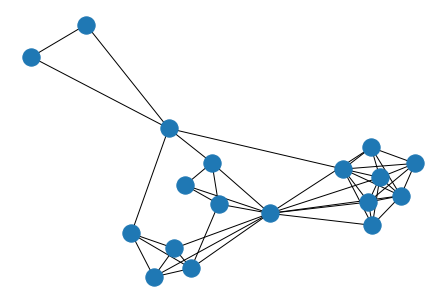

In [227]:

nx.draw(TacmeNetwork)
plt.show()


In [151]:
!python setup.py install --include-path=/usr/local/Cellar/graphviz/2.38.0/include/graphviz --library-path=/usr/local/Cellar/graphviz/2.38.0/lib

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [0]:
import pygraphviz as pgv

A = nx.nx_agraph.to_agraph(TacmeNetwork)

In [0]:
f =Digraph(A)
f.attr(rankdir ='LR', size = '8.5')

In [0]:
#to dot

B = nx.nx_pydot.to_pydot(TacmeNetwork)

In [158]:
A

<AGraph <Swig Object of type 'Agraph_t *' at 0x7ff977e1bf60>>

In [185]:
nx.drawing.nx_pydot.graphviz_layout(TacmeNetwork)

{'0': (97.771, 18.393),
 '1': (156.1, 18.0),
 '10': (184.08, 164.46),
 '11': (188.67, 199.09),
 '12': (267.63, 163.97),
 '13': (186.49, 242.61),
 '14': (217.56, 225.82),
 '15': (67.179, 265.42),
 '16': (127.44, 214.53),
 '17': (103.74, 269.16),
 '2': (125.87, 94.405),
 '3': (35.842, 111.45),
 '4': (212.13, 131.9),
 '5': (98.047, 177.69),
 '6': (64.64, 154.82),
 '7': (51.712, 214.52),
 '8': (27.0, 181.38),
 '9': (224.05, 190.71)}

In [0]:
C = Digraph(B)

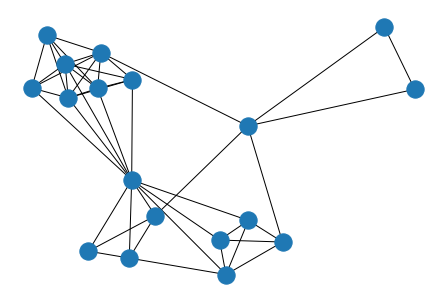

In [207]:
nx.draw_spring(TacmeNetwork, axes= True)

In [0]:


pos = nx.nx_pydot.graphviz_layout(TacmeNetwork, prog='dot')

In [209]:
pos

{'0': (317.47, 738.0),
 '1': (345.47, 666.0),
 '10': (377.47, 378.0),
 '11': (267.47, 306.0),
 '12': (343.47, 234.0),
 '13': (153.47, 234.0),
 '14': (343.47, 162.0),
 '15': (39.468, 162.0),
 '16': (170.47, 90.0),
 '17': (39.468, 18.0),
 '2': (317.47, 594.0),
 '3': (660.47, 378.0),
 '4': (317.47, 522.0),
 '5': (30.468, 234.0),
 '6': (605.47, 306.0),
 '7': (605.47, 234.0),
 '8': (660.47, 162.0),
 '9': (229.47, 450.0)}

In [0]:
import matplotlib.pyplot as plt

In [213]:
fig = plt.subplots(pos)

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [88]:
#The number of nodes in this network is

TacmeNetwork.number_of_nodes()


18

In [89]:
#The number of edges in this network is:

TacmeNetwork.number_of_edges()

45

In [90]:
TacmeNetwork.nodes()

NodeView(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'))

In [91]:
TacmeNetwork.edges()

EdgeView([('0', '1'), ('0', '2'), ('1', '2'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('4', '9'), ('4', '10'), ('4', '11'), ('4', '12'), ('4', '13'), ('4', '14'), ('5', '15'), ('5', '16'), ('5', '17'), ('6', '7'), ('6', '8'), ('6', '16'), ('7', '8'), ('7', '17'), ('7', '16'), ('8', '16'), ('9', '10'), ('9', '11'), ('9', '12'), ('9', '13'), ('9', '14'), ('9', '16'), ('10', '11'), ('10', '12'), ('10', '13'), ('10', '14'), ('10', '16'), ('11', '12'), ('11', '13'), ('11', '16'), ('12', '14'), ('13', '16'), ('14', '16'), ('15', '16'), ('15', '17'), ('16', '17')])

In [0]:
TacmeNetwork['0']['1']['color']='red'

In [98]:
TacmeNetwork.edges()

EdgeView([('0', '1'), ('0', '2'), ('1', '2'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('4', '9'), ('4', '10'), ('4', '11'), ('4', '12'), ('4', '13'), ('4', '14'), ('5', '15'), ('5', '16'), ('5', '17'), ('6', '7'), ('6', '8'), ('6', '16'), ('7', '8'), ('7', '17'), ('7', '16'), ('8', '16'), ('9', '10'), ('9', '11'), ('9', '12'), ('9', '13'), ('9', '14'), ('9', '16'), ('10', '11'), ('10', '12'), ('10', '13'), ('10', '14'), ('10', '16'), ('11', '12'), ('11', '13'), ('11', '16'), ('12', '14'), ('13', '16'), ('14', '16'), ('15', '16'), ('15', '17'), ('16', '17')])

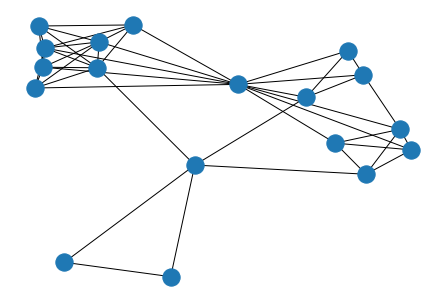

In [102]:
nx.draw_spring(TacmeNetwork)

In [244]:
edge_colors[0:7]

NameError: ignored

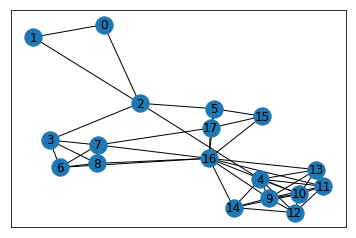

In [103]:
C = nx.draw_networkx(TacmeNetwork)

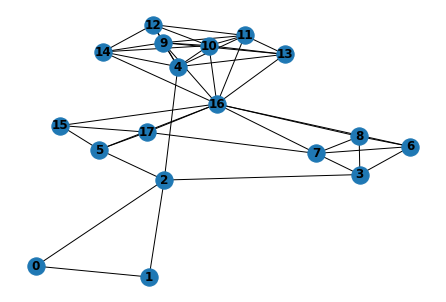

In [243]:
nx.draw(TacmeNetwork, 
        nlist=[range(5, 10), range(5)], 
        with_labels=True, font_weight='bold')

TypeError: ignored

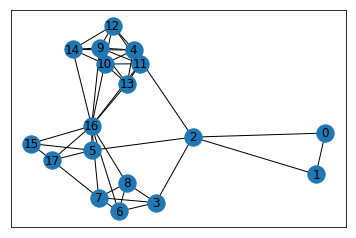

In [51]:
import matplotlib.pyplot as plt
import networkx as nx

Graph = nx.draw_networkx(G_symmetric)
pos = nx.spring_layout(G_symmetric)
# default
plt.figure(1)
nx.draw(Graph,pos)





In [41]:
# smaller nodes and fonts
plt.figure(2)
nx.draw(G,pos,node_size=60,font_size=8)

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [42]:
 
# larger figure size
plt.figure(3,figsize=(12,12)) 
nx.draw(G,pos)
plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

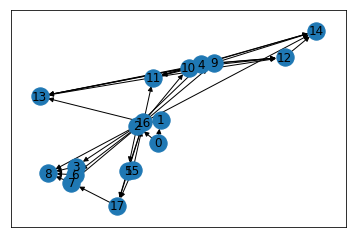

In [23]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('0','1', weight = 1)
G_asymmetric.add_edge('0','2', weight = 1)
G_asymmetric.add_edge('1','2', weight = 1)

G_asymmetric.add_edge('2','3', weight = 2)
G_asymmetric.add_edge('2','4', weight = 2)
G_asymmetric.add_edge('2','5', weight = 3)

G_asymmetric.add_edge('3','6', weight = 4)
G_asymmetric.add_edge('3','7', weight = 5)
G_asymmetric.add_edge('3','8', weight = 5)

G_asymmetric.add_edge('4','9', weight = 6)
G_asymmetric.add_edge('4','10', weight = 4)
G_asymmetric.add_edge('4','11', weight = 5)
G_asymmetric.add_edge('4','12', weight = 7)
G_asymmetric.add_edge('4','13', weight = 4)
G_asymmetric.add_edge('4','14', weight = 5)

G_asymmetric.add_edge('5','15', weight = 5)
G_asymmetric.add_edge('5','16', weight = 3)
G_asymmetric.add_edge('5','17', weight = 5)

G_asymmetric.add_edge('6','7', weight = 3)
G_asymmetric.add_edge('6','8', weight = 4)

G_asymmetric.add_edge('7','8', weight = 4)

G_asymmetric.add_edge('9','10', weight = 2)
G_asymmetric.add_edge('9','11', weight = 4)
G_asymmetric.add_edge('9','12', weight = 7)
G_asymmetric.add_edge('9','13', weight = 2)
G_asymmetric.add_edge('9','14', weight = 4)

G_asymmetric.add_edge('10','11', weight = 5)
G_asymmetric.add_edge('10','12', weight = 5)
G_asymmetric.add_edge('10','13', weight = 4)
G_asymmetric.add_edge('10','14', weight = 3)

G_asymmetric.add_edge('11','12', weight = 3)
G_asymmetric.add_edge('11','13', weight = 4)

G_asymmetric.add_edge('12','14', weight = 3)

G_asymmetric.add_edge('15','16', weight = 3)
G_asymmetric.add_edge('15','17', weight = 4)

G_asymmetric.add_edge('16','17', weight = 5)

G_asymmetric.add_edge('17','7', weight = 1)

G_asymmetric.add_edge('16','6', weight = 2)
G_asymmetric.add_edge('16','7', weight = 2)
G_asymmetric.add_edge('16','8', weight = 3)
G_asymmetric.add_edge('16','9', weight = 2)
G_asymmetric.add_edge('16','11', weight = 2)
G_asymmetric.add_edge('16','13', weight = 2)
G_asymmetric.add_edge('16','14', weight = 2)
G_asymmetric.add_edge('16','10', weight = 2)


nx.draw_networkx(G_asymmetric)

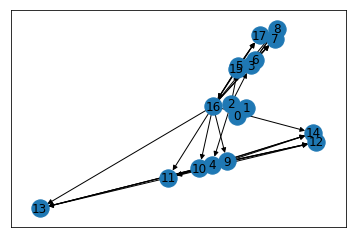

In [61]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In [29]:
nx.average_clustering(G_symmetric)



0.7111832611832613

In [32]:
nx.shortest_path(G_symmetric, '9', '1')


['9', '4', '2', '1']

In [0]:
T = nx.bfs_tree(G_symmetric, '9')

In [38]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(100, 600), dpi=800, facecolor='w', edgecolor='k')

<Figure size 80000x480000 with 0 Axes>

<Figure size 80000x480000 with 0 Axes>

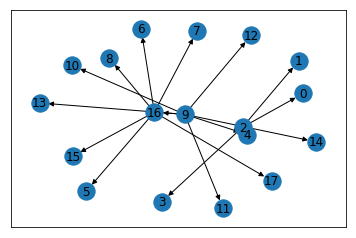

In [39]:
nx.draw_networkx(T)

In [0]:
G.add_node(1)

G.add_nodes_from([2, 3])